In [1]:
import pandas as pd

In [2]:
seed=1234

In [3]:
#Abro el archivo con la informacion
#Normalizada
#data = pd.read_csv('attritionDataWithDummyVarsAndNorm.csv')
#Sin normalizar
data = pd.read_csv('attritionDataWithDummyVars.csv')


#Ensamble
#data = pd.read_csv('ensamble.csv')

### Data split

In [4]:
y=data['Dummy_Attrition_Yes']
x=data.drop(['Dummy_Attrition_Yes'], axis=1)

In [5]:
x.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,Dummy_JobRole_Research Director,Dummy_JobRole_Research Scientist,Dummy_JobRole_Sales Executive,Dummy_JobRole_Sales Representative,Dummy_MaritalStatus_Divorced,Dummy_MaritalStatus_Married,Dummy_MaritalStatus_Single,Dummy_Over18_Y,Dummy_OverTime_No,Dummy_OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,1,0,1,1,0


In [6]:
#from sklearn import preprocessing
#Xn = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
#Xn[0:5]

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=seed )

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
#model = LogisticRegression(C=0.01, solver='liblinear', random_state=seed).fit(x_train,y_train)
model = LogisticRegression(C=1000,max_iter=10000,random_state=seed).fit(x_train,y_train)
model

LogisticRegression(C=1000, max_iter=10000, random_state=1234)

In [9]:
y_pred_train=model.predict(x_train)

In [10]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_train, y_pred_train)
print(confusionMatrix)

### MATRIX IS INVERTED
## TN | FP
## FN | TP

[[841  22]
 [ 90  76]]


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       863
           1       0.78      0.46      0.58       166

    accuracy                           0.89      1029
   macro avg       0.84      0.72      0.76      1029
weighted avg       0.88      0.89      0.88      1029



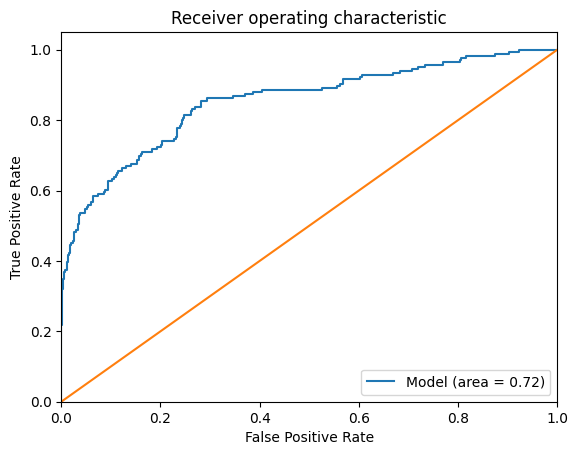

In [12]:
#Printes the area under the roc curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 


model_roc_auc = roc_auc_score(y_train, model.predict(x_train))
fpr, tpr, thresholds = roc_curve(y_train, model.predict_proba(x_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Model (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.savefig('DT_ROC')
plt.show()

In [13]:
y_pred = model.predict(x_test)

In [14]:
prob = model.predict_proba(x_test)
prob[:,1]

array([1.45968872e-01, 1.19701506e-01, 3.94495594e-01, 7.16476987e-02,
       2.90554342e-01, 2.88820656e-02, 1.50198676e-02, 4.61983982e-02,
       2.03569031e-01, 3.38777720e-02, 2.21716439e-01, 5.52608275e-03,
       9.73528374e-01, 1.93874361e-02, 2.14679799e-02, 2.12092990e-02,
       8.90786736e-02, 4.85020729e-02, 1.00129872e-01, 7.29623949e-03,
       8.34565152e-02, 2.35851447e-01, 1.38495643e-02, 1.02688006e-02,
       2.52677537e-02, 5.95904546e-04, 1.31106244e-01, 8.94599672e-02,
       2.83045973e-01, 1.53001787e-02, 5.54770301e-02, 6.74628500e-02,
       8.09887248e-02, 2.56620007e-02, 2.35423597e-01, 8.52087636e-01,
       3.23738844e-01, 7.55714547e-02, 3.39805316e-02, 4.00111351e-01,
       4.47373510e-02, 1.19637504e-01, 6.67525706e-04, 1.19466872e-01,
       1.12227065e-02, 7.96232423e-02, 3.30714136e-01, 1.70370100e-03,
       4.92672602e-03, 6.18784893e-04, 5.75393735e-03, 7.47146180e-03,
       6.64114581e-01, 5.03562563e-02, 7.98479427e-03, 2.36242047e-02,
      

In [15]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, y_pred)
print(confusionMatrix)

### MATRIX IS INVERTED
## TN | FP
## FN | TP

[[365   5]
 [ 38  33]]


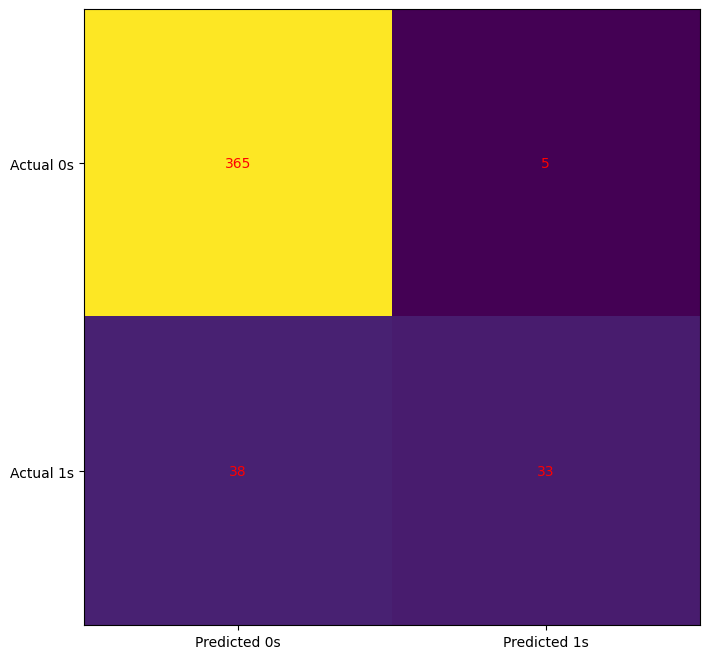

In [16]:
import matplotlib.pyplot as plt
cm = confusionMatrix

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

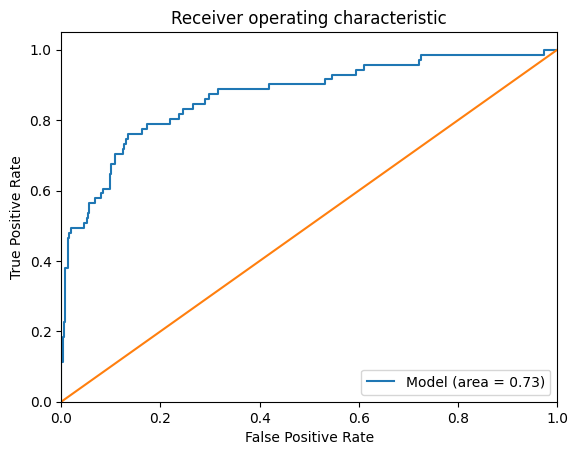

In [17]:
#Printes the area under the roc curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 


model_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Model (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.savefig('DT_ROC')
plt.show()

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#precision is the ratio tp / (tp + fp) % of real positive over all the positives given by the algorithm
#recall is the ratio tp / (tp + fn) positive predictions over total positive
#Accuracy tp+tn/(tp+tn+fp+fn)
#Specificity= tn/tn+fp negative predictions over total positive

tn=confusionMatrix[0,0]
fp=confusionMatrix[0,1]
fn=confusionMatrix[1,0]
tp=confusionMatrix[1,1]

# Second line on output is the good one

              precision    recall  f1-score   support

           0       0.91      0.99      0.94       370
           1       0.87      0.46      0.61        71

    accuracy                           0.90       441
   macro avg       0.89      0.73      0.77       441
weighted avg       0.90      0.90      0.89       441



In [19]:
model.coef_

array([[-3.31267147e-02, -3.79869311e-04,  4.40034286e-02,
        -2.01087973e-01,  9.89141514e-04, -8.33360691e-05,
        -4.25181596e-01, -3.10774276e-04, -4.72007809e-01,
        -2.34891740e-01, -3.52489168e-01, -1.10361525e-05,
        -1.47647951e-05,  1.70039824e-01, -1.86828816e-03,
        -8.23563250e-03, -2.28062986e-01,  7.91313211e-02,
        -4.44290757e-02, -5.15529905e-02, -1.39442782e-01,
        -3.64759266e-01,  7.83691292e-02, -1.15189500e-01,
         1.60505088e-01, -1.34164378e-01, -7.14235248e-01,
         7.90411113e-01, -7.51867239e-02,  3.51616248e-02,
        -3.22822615e-01,  2.88650132e-01,  7.01270095e-02,
        -8.86682732e-02,  2.49155608e-01, -4.81510080e-01,
        -1.31020108e-01,  3.82904985e-01, -2.36042138e-01,
         2.37031280e-01, -2.46833875e-01,  7.00399500e-02,
         7.89334311e-01,  1.57139325e-02, -3.66035544e-01,
        -1.62966450e-01, -3.57835729e-01,  1.27141092e-02,
         2.46858436e-01, -5.87724987e-01, -1.89281850e-0

In [20]:
model.intercept_

array([0.00098923])

### Export results to CSV

In [21]:
aux=x_test
aux['predict']=y_pred
aux[['EmployeeNumber','predict']]

,EmployeeNumber,predict
298,407,0
625,864,0
1349,1893,0
1361,1918,0
343,463,0
...,...,...
1395,1967,0
305,419,0
1256,1760,0
553,763,0


In [22]:
aux.to_csv('AttrttionResultsLogReg', index=False) 